In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/My Drive/data'

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datathon/sorted_filtered_source_data.csv')

In [ ]:
df.shape


(4680360, 14)

In [ ]:
df

,customer_id,day_no,usage_app_facebook_daily,usage_app_helakuru_daily,usage_app_other,usage_app_tiktok_daily,usage_app_whatsapp_daily,usage_app_youtube_daily,usage_pack_data,usage_pack_vas,usage_voice_d2d_incoming,usage_voice_d2d_outgoing,usage_voice_d2nd_outgoing,usage_voice_nd2d_incoming
0,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,1,60.31,32.38,159.70,39.77,12.23,0.00,100.52,28.93,36.91,55.62,34.91,10.47
1,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,2,0.00,58.27,56.24,280.53,6.47,242.45,99.60,15.20,6.43,67.57,16.74,16.54
2,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,3,133.73,12.05,135.03,168.41,10.51,274.21,98.73,30.40,28.52,98.07,17.92,15.46
3,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,4,262.71,0.00,120.87,100.44,9.33,0.00,99.64,20.88,23.28,215.60,27.30,19.80
4,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,5,96.26,27.85,118.67,492.71,10.04,313.87,99.94,18.70,11.89,0.00,37.04,16.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680355,fffff7f18e3f2477c5c981222df6260c01b0e9324cfc87...,86,277.94,48.34,303.31,0.00,0.00,261.67,48.31,0.00,32.74,43.46,0.00,0.00
4680356,fffff7f18e3f2477c5c981222df6260c01b0e9324cfc87...,87,329.72,49.20,451.45,0.00,11.65,228.95,0.00,0.00,58.11,11.80,0.00,0.00
4680357,fffff7f18e3f2477c5c981222df6260c01b0e9324cfc87...,88,341.92,48.99,413.73,0.00,0.00,223.03,154.70,0.00,32.52,9.40,0.00,0.00
4680358,fffff7f18e3f2477c5c981222df6260c01b0e9324cfc87...,89,337.44,50.05,341.92,0.00,0.00,237.96,259.29,0.00,8.91,71.29,0.00,0.00


In [ ]:
# melted_df = pd.melt(df, id_vars=['customer_id', 'daily_usage'], var_name='day_no', value_name='data_usage')

# pivoted_df = melted_df.pivot_table(index=['customer_id', 'day_no'], columns='daily_usage', values='data_usage', aggfunc='first')

# pivoted_df = pivoted_df.reset_index()


# pivoted_df.columns.name = None
# pivoted_df.columns = ['customer_id', 'day_no'] + [f"{app}" for app in pivoted_df.columns[2:]]

# pivoted_df.head(15)

# melted_df = pd.melt(df, id_vars=['customer_id', 'daily_usage'], var_name='day_no', value_name='data_usage')

# # Pivot the melted dataframe to get application names as columns
# pivoted_df = melted_df.pivot_table(index=['customer_id', 'day_no'], columns='daily_usage', values='data_usage', aggfunc='first')

# # Reset index to bring 'customer_id' and 'day_no' back as columns
# pivoted_df = pivoted_df.reset_index()

# # Rename the columns for application names
# pivoted_df.columns.name = None
# pivoted_df.columns = ['customer_id', 'day_no'] + [f"{app}" for app in pivoted_df.columns[2:]]

# pivoted_df['day_no'] = pivoted_df['day_no'].astype(int)
# pivoted_df = pivoted_df.sort_values(by=['customer_id', 'day_no'])

# # Reset index again after sorting
# pivoted_df = pivoted_df.reset_index(drop=True)

# # Assuming 'pivoted_df' is the final transformed dataframe
# pivoted_df.head(20)

# melted_df = pd.melt(df, id_vars=['customer_id', 'daily_usage'], var_name='day_no', value_name='data_usage')

# pivoted_df = melted_df.pivot_table(index=['customer_id', 'day_no'], columns='daily_usage', values='data_usage', aggfunc='first')

# pivoted_df = pivoted_df.reset_index()

# pivoted_df.columns.name = None
# pivoted_df.columns = ['customer_id', 'day_no'] + [f"{app}" for app in pivoted_df.columns[2:]]
# pivoted_df['day_no'] = pivoted_df['day_no'].str.extract('(\d+)').astype(int)
# pivoted_df = pivoted_df.sort_values(by=['customer_id', 'day_no'])

# pivoted_df = pivoted_df.reset_index(drop=True)
# print(pivoted_df.head(20))



In [ ]:
pivoted_df

In [ ]:
missing_values = df.isna().sum()
print(missing_values)
missing_percentages = (df.isnull().sum() / len(df)) * 100
print(missing_percentages)

customer_id                  0
day_no                       0
usage_app_facebook_daily     0
usage_app_helakuru_daily     0
usage_app_other              0
usage_app_tiktok_daily       0
usage_app_whatsapp_daily     0
usage_app_youtube_daily      0
usage_pack_data              0
usage_pack_vas               0
usage_voice_d2d_incoming     0
usage_voice_d2d_outgoing     0
usage_voice_d2nd_outgoing    0
usage_voice_nd2d_incoming    0
dtype: int64
customer_id                  0.0
day_no                       0.0
usage_app_facebook_daily     0.0
usage_app_helakuru_daily     0.0
usage_app_other              0.0
usage_app_tiktok_daily       0.0
usage_app_whatsapp_daily     0.0
usage_app_youtube_daily      0.0
usage_pack_data              0.0
usage_pack_vas               0.0
usage_voice_d2d_incoming     0.0
usage_voice_d2d_outgoing     0.0
usage_voice_d2nd_outgoing    0.0
usage_voice_nd2d_incoming    0.0
dtype: float64


In [ ]:
customer_ids = pivoted_df['customer_id']
days = pivoted_df['day_no']
data_without_id = pivoted_df.drop(columns=['customer_id','day_no'])

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_without_id)

imputed_df = pd.DataFrame(data_imputed, columns=data_without_id.columns)
imputed_df.insert(0, 'customer_id', customer_ids)
#imputed_df.insert(1, 'day_no', days) This one left as a comment because at first we did not convert the day values to numerical values
imputed_df.to_csv('imputed_data.csv', index=False)

In [ ]:
df.dtypes

In [ ]:
customer_id_column = df['customer_id']
day_no_column = df['day_no']
columns_to_normalize = df.columns.difference(['customer_id','day_no'])

# Extract the columns you want to normalize using double square brackets
features = df[columns_to_normalize]

# Create a StandardScaler instance
scaler = MinMaxScaler()

# Fit the scaler on your feature data to compute mean and standard deviation
scaler.fit(features)

# Transform the features to have zero mean and unit variance
normalized_features = scaler.transform(features)
scaled_data = scaler.fit_transform(features)

# Create a new DataFrame with normalized features
normalized_data = pd.DataFrame(normalized_features, columns=columns_to_normalize)

# Combine the customer_id column with the normalized features
normalized_data = pd.concat([customer_id_column,day_no_column, normalized_data], axis=1)

In [ ]:
normalized_data

,customer_id,day_no,usage_app_facebook_daily,usage_app_helakuru_daily,usage_app_other,usage_app_tiktok_daily,usage_app_whatsapp_daily,usage_app_youtube_daily,usage_pack_data,usage_pack_vas,usage_voice_d2d_incoming,usage_voice_d2d_outgoing,usage_voice_d2nd_outgoing,usage_voice_nd2d_incoming
0,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,1,0.034228,0.127541,0.068761,0.025969,0.047972,0.000000,0.042677,0.061548,0.072048,0.126616,0.076843,0.022298
1,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,2,0.000000,0.229518,0.024215,0.183182,0.025379,0.085401,0.042287,0.032338,0.012551,0.153820,0.036848,0.035225
2,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,3,0.075897,0.047463,0.058139,0.109969,0.041225,0.096589,0.041917,0.064675,0.055671,0.223252,0.039445,0.032925
3,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,4,0.149098,0.000000,0.052042,0.065586,0.036597,0.000000,0.042304,0.044422,0.045442,0.490803,0.060092,0.042168
4,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,5,0.054631,0.109697,0.051095,0.321732,0.039382,0.110558,0.042431,0.039784,0.023209,0.000000,0.081532,0.035672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680355,fffff7f18e3f2477c5c981222df6260c01b0e9324cfc87...,86,0.157741,0.190405,0.130595,0.000000,0.000000,0.092171,0.020511,0.000000,0.063908,0.098935,0.000000,0.000000
4680356,fffff7f18e3f2477c5c981222df6260c01b0e9324cfc87...,87,0.187128,0.193792,0.194379,0.000000,0.045697,0.080646,0.000000,0.000000,0.113430,0.026862,0.000000,0.000000
4680357,fffff7f18e3f2477c5c981222df6260c01b0e9324cfc87...,88,0.194052,0.192965,0.178138,0.000000,0.000000,0.078561,0.065680,0.000000,0.063478,0.021399,0.000000,0.000000
4680358,fffff7f18e3f2477c5c981222df6260c01b0e9324cfc87...,89,0.191510,0.197140,0.147219,0.000000,0.000000,0.083820,0.110086,0.000000,0.017392,0.162288,0.000000,0.000000


In [ ]:
averages_df = normalized_data.groupby('customer_id').mean().reset_index()

# Print the resulting DataFrame
averages_df

,customer_id,day_no,usage_app_facebook_daily,usage_app_helakuru_daily,usage_app_other,usage_app_tiktok_daily,usage_app_whatsapp_daily,usage_app_youtube_daily,usage_pack_data,usage_pack_vas,usage_voice_d2d_incoming,usage_voice_d2d_outgoing,usage_voice_d2nd_outgoing,usage_voice_nd2d_incoming
0,0000f727854b50bb95c054b39c1fe5c92e5ebcfa4bcb5d...,45.5,0.060077,0.114173,0.063259,0.108895,0.004411,0.114258,0.023566,0.074409,0.007563,0.061809,0.066149,0.030579
1,0001702d0abcdbeeb23f7c434aa6858030f365caf1464a...,45.5,0.026701,0.016752,0.018206,0.094983,0.005684,0.018400,0.017806,0.005808,0.091961,0.011041,0.006400,0.033193
2,0001ae52a920c36edc7ab364ea58a58ca725f0ad44c02b...,45.5,0.015384,0.017191,0.097495,0.079635,0.012873,0.044578,0.087213,0.021071,0.007828,0.015572,0.057645,0.046671
3,0002511664bff302e40b19ed6872ad4390ac59901e55e2...,45.5,0.023840,0.075551,0.057202,0.077689,0.058769,0.040843,0.008889,0.074151,0.021269,0.099751,0.054767,0.024816
4,0003dbd80ea9a5fb7a2efabdb984c5fa75450cda717e39...,45.5,0.070738,0.073752,0.037369,0.094547,0.083770,0.055634,0.098719,0.052773,0.018596,0.008460,0.028492,0.018654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51999,fff948ff9ad56e065cf0d41edf21e662a1e922c1164316...,45.5,0.012613,0.003306,0.072923,0.007259,0.076455,0.005677,0.008482,0.003377,0.048485,0.010687,0.012646,0.005516
52000,fff97955ee8ec52258c16d0cd8b4aaa78179e6919e3620...,45.5,0.085965,0.005373,0.009126,0.017228,0.003161,0.014541,0.003736,0.018207,0.005895,0.006418,0.009520,0.017676
52001,fffe405de842df7e82d3a610b0917dfd79fc2fd526cfbe...,45.5,0.042992,0.082851,0.056996,0.111240,0.040810,0.091964,0.073132,0.086810,0.055190,0.104969,0.049501,0.095257
52002,ffffc7a636e58b3c81ca8d4c7869ab1b109c84d29d8f33...,45.5,0.021592,0.005648,0.069863,0.052834,0.041312,0.055029,0.007591,0.090080,0.005158,0.005452,0.016043,0.065688


In [ ]:
scaled_data

array([[0.03422815, 0.12754057, 0.06876122, ..., 0.12661628, 0.0768435 ,
        0.02229794],
       [0.        , 0.22951788, 0.02421497, ..., 0.15381989, 0.0368479 ,
        0.03522522],
       [0.07589671, 0.04746337, 0.05813918, ..., 0.22325168, 0.0394453 ,
        0.03292514],
       ...,
       [0.19405221, 0.19296518, 0.17813763, ..., 0.02139865, 0.        ,
        0.        ],
       [0.19150965, 0.19714038, 0.14721877, ..., 0.16228829, 0.        ,
        0.        ],
       [0.13864926, 0.20029148, 0.19311268, ..., 0.0874613 , 0.08298481,
        0.        ]])

In [ ]:
scaled_data.shape

(4680360, 12)

In [ ]:
features = scaled_data

In [ ]:
targets = pd.read_csv('/content/drive/MyDrive/datathon/sorted_train_data.csv')

In [ ]:
target = targets['churn_status']

In [ ]:
target.shape

(52004,)

In [ ]:
i = features.shape[0] // 90
reshaped_features = features.reshape(i, 90, 12)
reshaped_features.shape

(52004, 90, 12)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(reshaped_features, target, test_size=0.20, random_state=123, shuffle=False)

In [ ]:
y_train_arr=np.array(y_train)
y_test_arr = np.array(y_test)

In [ ]:
x_train.shape

(41603, 90, 12)

In [ ]:
reshaped_x_train = x_train.reshape(3744270, 12)

In [ ]:
reshaped_x_train

array([[0.03422815, 0.12754057, 0.06876122, ..., 0.12661628, 0.0768435 ,
        0.02229794],
       [0.        , 0.22951788, 0.02421497, ..., 0.15381989, 0.0368479 ,
        0.03522522],
       [0.07589671, 0.04746337, 0.05813918, ..., 0.22325168, 0.0394453 ,
        0.03292514],
       ...,
       [0.18346198, 0.09622656, 0.18579738, ..., 0.21935895, 0.        ,
        0.12893196],
       [0.17905789, 0.09350874, 0.27340874, ..., 0.22136223, 0.11919436,
        0.05379619],
       [0.28137344, 0.09559634, 0.12704249, ..., 0.23964214, 0.24893242,
        0.16813971]])

In [ ]:
x_test.shape

(10401, 90, 12)

In [ ]:
reshaped_x_test = x_test.reshape(936090, 12)

In [ ]:
reshaped_x_test[0]

array([0.04031215, 0.12765874, 0.        , 0.13412301, 0.14391622,
       0.0695715 , 0.10625597, 0.04027317, 0.03015811, 0.04329812,
       0.1214836 , 0.        ])

In [ ]:
def find_y_values(arr_len,strike,data_array):
  array_with_value = np.full(arr_len,2)

  for i in range(len(data_array)):

    c= strike+i*strike

    if c<len(array_with_value):
      array_with_value[c] = data_array[i]
      #print(array_with_value[c],data_array[i])

  return array_with_value

In [ ]:
train_test_lables = find_y_values(len(reshaped_x_train),90,y_train_arr)

In [ ]:
test_test_lables = find_y_values(len(reshaped_x_test),90,y_test_arr)

In [ ]:
test_test_lables[191]

2

In [ ]:
# i = 90
# s = 90
# iteration = 90 * 41603 / 90
# length = 90 * 41603

In [ ]:
# churn_array_train = np.full(length, -1)

In [ ]:
# iteration = 0
# index = 0

# for x in range(0, 41603):
#   index = i + (s * iteration)

#   if index == 3744270:
#     break

#   churn_array_train[index] = y_train[iteration]
#   iteration = iteration + 1


In [ ]:
# churn_array_train[::90]

In [ ]:
# count =0
# for _ in churn_array_train:
#   if(_==0 or _==1):
#     count +=1
# print(count)

In [ ]:
# i = 90
# s = 90
# len_test = 90*10401
# churn_array_test = np.full(len_test, -1)

In [ ]:
# churn_array_test

In [ ]:
# y_test

In [ ]:
# iteration = 41603
# index = 0

# for x in range(0, 10401):
#   index = i + (s * (iteration - 41603))

#   if index == 936090:
#     break

#   churn_array_test[index] = y_test[iteration]
#   iteration = iteration + 1

In [ ]:
# print(len(churn_array_train))

3744270


In [ ]:
# reshaped_x_train.shape

(3744270, 12)

In [ ]:
win_length = 90
batch_size = 1200
num_features = 12

train_generator = TimeseriesGenerator(reshaped_x_train,train_test_lables , length = win_length, sampling_rate=1, batch_size=batch_size, stride=90)
test_generator = TimeseriesGenerator(reshaped_x_test, test_test_lables, length=win_length, sampling_rate=1, batch_size=batch_size, stride=90)

In [ ]:
train_generator[1]

In [ ]:
train_test_lables[:90]

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(1200, input_shape=(win_length,num_features), return_sequences=True))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.LSTM(1200, return_sequences=True))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(600, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 90, 1200)          5822400   
                                                                 
 re_lu_4 (ReLU)              (None, 90, 1200)          0         
                                                                 
 lstm_7 (LSTM)               (None, 90, 1200)          11524800  
                                                                 
 re_lu_5 (ReLU)              (None, 90, 1200)          0         
                                                                 
 dropout_4 (Dropout)         (None, 90, 1200)          0         
                                                                 
 lstm_8 (LSTM)               (None, 600)               4322400   
                                                                 
 dropout_5 (Dropout)         (None, 600)              

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# # Define the number of folds for cross-validation
# num_folds = 5

# # Initialize KFold cross-validator
# kf = KFold(n_splits=num_folds, shuffle=True)

# # Lists to store evaluation results for each fold
# fold_losses = []
# fold_accuracies = []

# # Perform k-fold cross-validation
# for train_indices, val_indices in kf.split(reshaped_x_train):
#     train_generator = TimeseriesGenerator(reshaped_x_train[train_indices], train_test_lables[train_indices],
#                                           length=win_length, sampling_rate=1, batch_size=batch_size)
#     val_generator = TimeseriesGenerator(reshaped_x_train[val_indices],  train_test_lables[val_indices],
#                                         length=win_length, sampling_rate=1, batch_size=batch_size)

#     # Compile the model for each fold
#     model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

#     # Train the model on the training data
#     history = model.fit_generator(train_generator, epochs=50, validation_data=val_generator, verbose=0)

#     # Evaluate the model on the validation data
#     evaluation_results = model.evaluate(val_generator)
#     fold_losses.append(evaluation_results[0])
#     fold_accuracies.append(evaluation_results[1])

# # Print average cross-validation results
# print("Average Loss:", np.mean(fold_losses))
# print("Average Accuracy:", np.mean(fold_accuracies))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0009), metrics=['accuracy'])
hisotry = model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False)

Epoch 1/50


<ipython-input-81-e12682e1a6db>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hisotry = model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False)


35/35 [==============================] - 49s 1s/step - loss: 0.3198 - accuracy: 0.8743 - val_loss: 0.0478 - val_accuracy: 0.9848
Epoch 2/50
35/35 [==============================] - 44s 1s/step - loss: 0.0379 - accuracy: 0.9870 - val_loss: 0.0376 - val_accuracy: 0.9874
Epoch 3/50
35/35 [==============================] - 44s 1s/step - loss: 0.0326 - accuracy: 0.9886 - val_loss: 0.0307 - val_accuracy: 0.9886
Epoch 4/50
35/35 [==============================] - 44s 1s/step - loss: 0.0389 - accuracy: 0.9869 - val_loss: 0.0370 - val_accuracy: 0.9873
Epoch 5/50
35/35 [==============================] - 44s 1s/step - loss: 0.0321 - accuracy: 0.9889 - val_loss: 0.0312 - val_accuracy: 0.9888
Epoch 6/50
35/35 [==============================] - 44s 1s/step - loss: 0.0293 - accuracy: 0.9898 - val_loss: 0.0341 - val_accuracy: 0.9890
Epoch 7/50
35/35 [==============================] - 44s 1s/step - loss: 0.0514 - accuracy: 0.9841 - val_loss: 1.5966 - val_accuracy: 0.8207
Epoch 8/50
35/35 [=============

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/datathon/sorted_filtered_test_source_data.csv')


In [ ]:
customer_id_column = test_data['customer_id']
day_no_column = test_data['day_no']
columns_to_normalize = test_data.columns.difference(['customer_id','day_no'])

# Extract the columns you want to normalize using double square brackets
features = test_data[columns_to_normalize]

# Create a StandardScaler instance
scaler = MinMaxScaler()

# Fit the scaler on your feature data to compute mean and standard deviation
scaler.fit(features)

# Transform the features to have zero mean and unit variance
normalized_features = scaler.transform(features)
scaled_data = scaler.fit_transform(features)



In [ ]:
scaled_data.shape

(1170090, 12)

In [ ]:
scaled_data[0]

array([0.04481355, 0.07390598, 0.16735366, 0.        , 0.        ,
       0.02893026, 0.        , 0.03668237, 0.06372681, 0.04572412,
       0.04766904, 0.04059129])

In [ ]:
b = scaled_data.shape[0]//90
reshaped_scaled_data = scaled_data.reshape(b,90,12)

prediction = model.predict(reshaped_scaled_data)

407/407 [==============================] - 10s 22ms/step


In [ ]:
prediction

array([[3.0013482e-06],
       [9.9996364e-01],
       [3.3406472e-05],
       ...,
       [8.6211265e-05],
       [1.2363263e-05],
       [1.0791563e-05]], dtype=float32)

In [ ]:
preds = pd.DataFrame(prediction)
preds.to_csv('predictions.csv', index=False)

In [ ]:
testing = pd.read_csv('/content/drive/MyDrive/datathon/sorted_test_data.csv', header=None, squeeze=True)

In [ ]:
preds = pd.read_csv('/content/predictions.csv', header=None, squeeze=True)

In [ ]:
preds

0        0.000000
1        0.000003
2        0.999964
3        0.000033
4        0.999942
           ...   
12997    0.000132
12998    0.000028
12999    0.000086
13000    0.000012
13001    0.000011
Name: 0, Length: 13002, dtype: float64

In [ ]:
merged_df = pd.DataFrame({'customer_id':testing, 'prob':preds})

In [ ]:
backup = merged_df

In [ ]:
merged_df

,customer_id,prob
0,customer_id,0.000000
1,000205e54ddf8bc7512490895ce397647faaedc114f411...,0.000003
2,00034ffafc06f53a7b5cad2d868905892f098ffe98b9bf...,0.999964
3,00050a199532994483f7714b3d77232b11441f7128e889...,0.000033
4,0005979f57859293006e88f5cd34bf31df13e8619dece1...,0.999942
...,...,...
12997,ffe4ae9efa1d9d4c6e53056a4875f52467fe55625294b0...,0.000132
12998,ffe9eda9fa494954d5e56a1450ef3577d698686e9e98fb...,0.000028
12999,ffef1e6d1781ec115d789a47e585aa78ecc3fb68619f4c...,0.000086
13000,fffb2a183f16a0295fcc2fd1b8c28a6c7aff5c8645b46c...,0.000012


In [ ]:
merged_df.drop(index=0, inplace=True)

In [ ]:
merged_df.to_csv('predictions_final.csv', index=False)

In [ ]:
merged_df

,customer_id,prob
1,000205e54ddf8bc7512490895ce397647faaedc114f411...,0.000003
2,00034ffafc06f53a7b5cad2d868905892f098ffe98b9bf...,0.999964
3,00050a199532994483f7714b3d77232b11441f7128e889...,0.000033
4,0005979f57859293006e88f5cd34bf31df13e8619dece1...,0.999942
5,000cda0704a843ff7cb7137cc2a87bddfa7390ea5561c3...,0.000240
...,...,...
12997,ffe4ae9efa1d9d4c6e53056a4875f52467fe55625294b0...,0.000132
12998,ffe9eda9fa494954d5e56a1450ef3577d698686e9e98fb...,0.000028
12999,ffef1e6d1781ec115d789a47e585aa78ecc3fb68619f4c...,0.000086
13000,fffb2a183f16a0295fcc2fd1b8c28a6c7aff5c8645b46c...,0.000012


In [ ]:
len(prediction)

13001

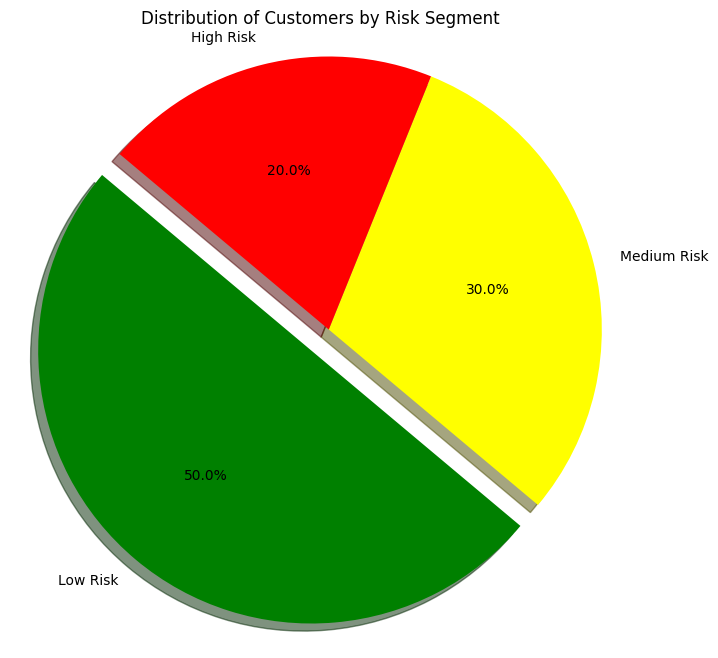

In [ ]:
# Replace this with your actual churn probabilities
num_customers = len(prediction)
churn_probabilities = np.random.rand(num_customers)

sorted_indices = np.argsort(churn_probabilities)
sorted_churn_probabilities = churn_probabilities[sorted_indices]

num_high_risk = int(num_customers * 0.2)  # 20% considered high risk
num_medium_risk = int(num_customers * 0.3)  # 30% considered medium risk

high_risk_indices = sorted_indices[-num_high_risk:]
medium_risk_indices = sorted_indices[-num_high_risk - num_medium_risk:-num_high_risk]
low_risk_indices = sorted_indices[:-num_high_risk - num_medium_risk]

# Count the number of customers in each risk segment
num_low_risk = len(low_risk_indices)
num_medium_risk = len(medium_risk_indices)
num_high_risk = len(high_risk_indices)

# Create a pie chart
labels = ['Low Risk', 'Medium Risk', 'High Risk']
sizes = [num_low_risk, num_medium_risk, num_high_risk]
colors = ['green', 'yellow', 'red']
explode = (0.1, 0, 0)  # explode the 1st slice (Low Risk)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Customers by Risk Segment')
plt.show()

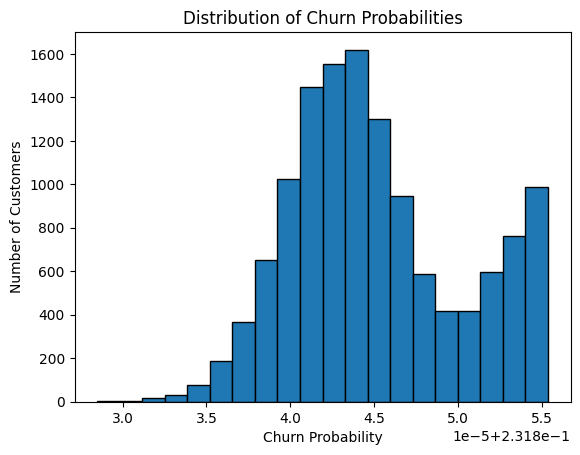

In [ ]:
plt.hist(merged_df['prob'], bins=20, edgecolor='black')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.title('Distribution of Churn Probabilities')
plt.show()

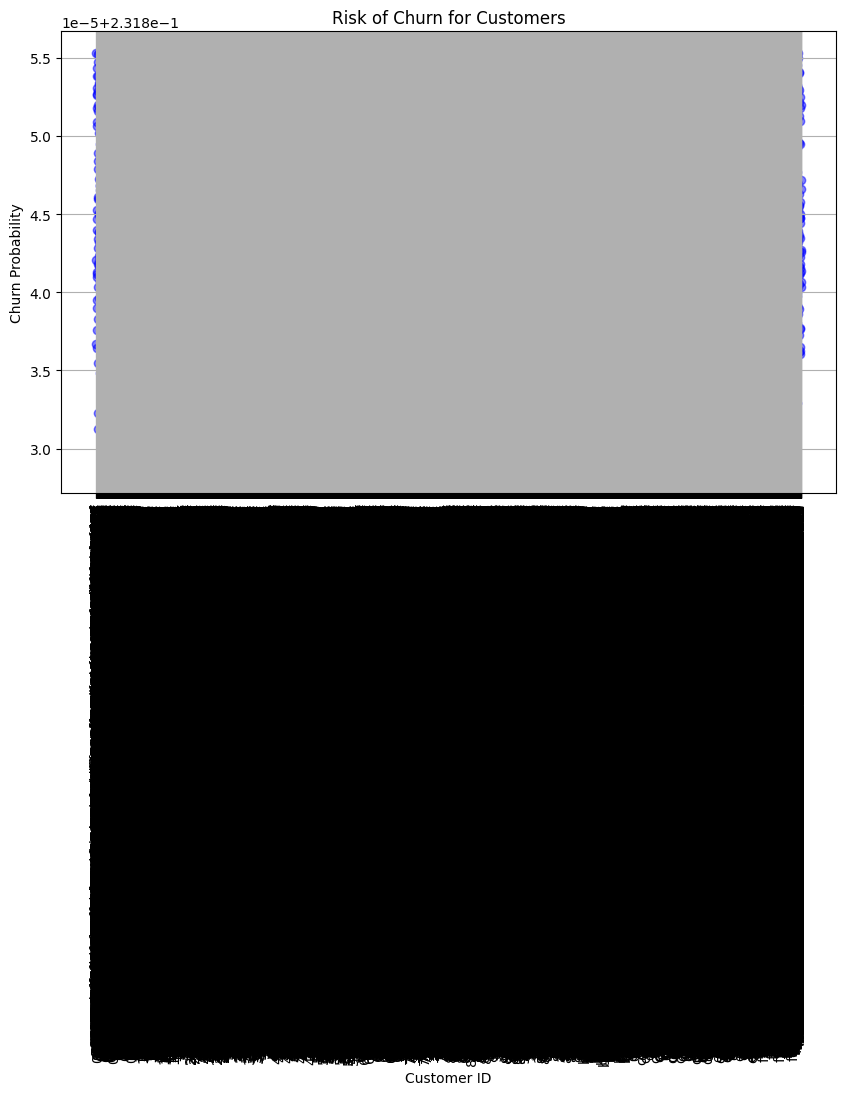

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['customer_id'], merged_df['prob'], color='blue', alpha=0.5)
plt.xlabel('Customer ID')
plt.ylabel('Churn Probability')
plt.title('Risk of Churn for Customers')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

In [ ]:
binary_predictions = (prediction > 0.5).astype(int)

In [ ]:
ground_truth = pd.read_csv('/content/drive/MyDrive/datathon/sorted_ground_truth.csv')

In [ ]:
ground_truth_values = ground_truth['churn_status']

In [ ]:
flatten = binary_predictions.flatten()

In [ ]:
flatten[:50]

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0])

In [ ]:
ground_truth_values.values[:50]

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0])

In [ ]:
accuracy = np.mean(flatten == ground_truth_values.values)

In [ ]:
accuracy

0.9954618875471117

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
precision = precision_score(ground_truth_values.values, flatten)
recall = recall_score(ground_truth_values.values, flatten)
f1 = f1_score(ground_truth_values.values, flatten)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9909182643794148
Recall: 0.9892545332437878
F1-Score: 0.9900856998823726
